In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from LUSI import LUSI_exact, LUSI_approx, LUSI_SVM
from predicates import f1, f2, f3
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.utils.estimator_checks import check_estimator
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

In [54]:
data = np.loadtxt(open("banana-shaped-data.csv", "rb"), delimiter=",", skiprows=0)
X = data[:, :2]
Y = data[:, -1]


(800, 2) (800,)


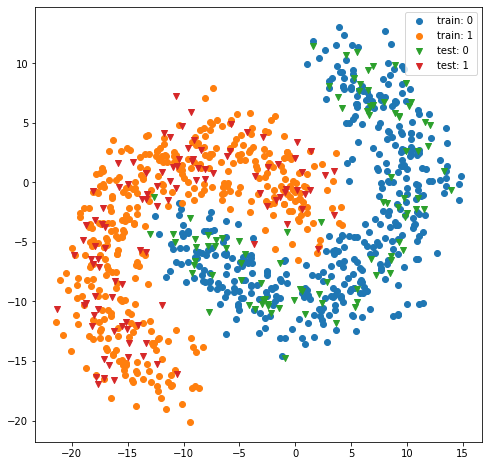

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label = "train: 0")
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label = "train: 1")
ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], marker = 'v', label = "test: 0")
ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], marker = 'v', label = "test: 1")
ax.legend()
fig.savefig("banana_data.pdf", format='pdf',  pad_inches=0.0)


In [91]:
def model_eval(class_name, predicate, hyper_params, X_train, y_train, X_test, y_test):
    # creating a KFold object with 5 splits 
    folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

    # specify range of hyperparameters
    # Set the parameters by cross-validation
    
    if predicate is None:
        predicate_size = 0
        X_train_ext = X_train
    else:
        Phi = predicate(X_train)
        #norm = np.sqrt(np.sum(Phi**2, axis=0, keepdims=True)) #normalization
        #norm[norm < 0.0001] = 1
        #Phi = Phi / norm
        predicate_size = Phi.shape[1]
        X_train_ext = np.concatenate((X_train, Phi), axis = 1)
    
    model = class_name(predicate_size = predicate_size)
    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = model, 
                            param_grid = hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True,
                            n_jobs=10)      

    # Cross validation
    %time model_cv.fit(X_train_ext, y_train)
    best_score = model_cv.best_score_
    best_hyperparams = model_cv.best_params_

    print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
    # Fit the final model with optimal hyperparameters
    model.set_params(**best_hyperparams)
    model.fit(X_train_ext, y_train)
    y_train_pred = model.predict(X_train_ext)
    y_test_pred = model.predict(np.concatenate( (X_test, np.zeros((X_test.shape[0], predicate_size))), axis=1))

    accuracy_train = np.mean(y_train_pred==y_train)
    accuracy_test = np.mean(y_test_pred==y_test)
    print("Train accuracy = ", accuracy_train)
    print("Test accuracy = ", accuracy_test)
    return model

# LUSI Exact

## No Predicate

In [92]:
hyper_params = [ {'tau': [1e-1, 1e-2, 1e-3, 1e-4],
                 'gamma': ['scale', 0.01, 0.1, 1],
                 'V_mtx': ['add', 'kde1', 'I']}]

model1 = model_eval(class_name=LUSI_exact, 
           predicate=None, 
           hyper_params=hyper_params, 
           X_train=X_train, 
           y_train=y_train, 
           X_test=X_test, 
           y_test=y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: user 544 ms, sys: 210 ms, total: 753 ms
Wall time: 3.68 s
The best test score is 0.985 corresponding to hyperparameters {'V_mtx': 'add', 'gamma': 0.1, 'tau': 0.01}
Train accuracy =  0.9975
Test accuracy =  0.975


## Predicate f1

In [93]:
hyper_params = [ {'tau': [1e-1, 1e-2, 1e-3, 1e-4],
                 'gamma': ['scale', 0.01, 0.1, 1],
                 'V_mtx': ['add', 'kde1', 'I']}]

model2 = model_eval(class_name=LUSI_exact, 
           predicate=f1, 
           hyper_params=hyper_params, 
           X_train=X_train, 
           y_train=y_train, 
           X_test=X_test, 
           y_test=y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: user 652 ms, sys: 190 ms, total: 842 ms
Wall time: 2.83 s
The best test score is 0.985 corresponding to hyperparameters {'V_mtx': 'add', 'gamma': 0.1, 'tau': 0.01}
Train accuracy =  0.9975
Test accuracy =  0.975


## Predicate f2

In [94]:
hyper_params = [ {'tau': [1e-1, 1e-2, 1e-3, 1e-4],
                 'gamma': ['scale', 0.01, 0.1, 1],
                 'V_mtx': ['add', 'kde1', 'I']}]

_ = model_eval(class_name=LUSI_exact, 
           predicate=f2, 
           hyper_params=hyper_params, 
           X_train=X_train, 
           y_train=y_train, 
           X_test=X_test, 
           y_test=y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: user 615 ms, sys: 197 ms, total: 813 ms
Wall time: 2.89 s
The best test score is 0.985 corresponding to hyperparameters {'V_mtx': 'add', 'gamma': 0.1, 'tau': 0.01}
Train accuracy =  0.9975
Test accuracy =  0.975


In [31]:
X_plot.shape

(10000, 2)

In [45]:
y_prob = predict_probability(model1)

(10000,)

# LUSI Approx

## No Predicate

In [95]:
hyper_params = [ {'tau': [0.01, 0.1, 0.5, 0.9, 0.99],
                  'lamda': [0.1, 0.01, 0.001], 
                  'gamma': ['scale', 0.01, 0.1, 1]}]

model3 = model_eval(class_name=LUSI_approx, 
           predicate=None, 
           hyper_params=hyper_params, 
           X_train=X_train, 
           y_train=y_train, 
           X_test=X_test, 
           y_test=y_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: user 682 ms, sys: 128 ms, total: 809 ms
Wall time: 3.19 s
The best test score is 0.985 corresponding to hyperparameters {'gamma': 0.1, 'lamda': 0.01, 'tau': 0.01}
Train accuracy =  0.9975
Test accuracy =  0.975


## Predicate f1

In [96]:
hyper_params = [ {'tau': [0.01, 0.1, 0.5, 0.9, 0.99],
                  'lamda': [0.1, 0.01, 0.001], 
                  'gamma': ['scale', 0.01, 0.1, 1]}]

model4 = model_eval(class_name=LUSI_approx, 
           predicate=f1, 
           hyper_params=hyper_params, 
           X_train=X_train, 
           y_train=y_train, 
           X_test=X_test, 
           y_test=y_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: user 543 ms, sys: 149 ms, total: 691 ms
Wall time: 3.22 s
The best test score is 0.9862500000000001 corresponding to hyperparameters {'gamma': 0.1, 'lamda': 0.1, 'tau': 0.01}
Train accuracy =  0.98875
Test accuracy =  0.975


## Predicate f2

In [97]:
hyper_params = [ {'tau': [0.01, 0.1, 0.5, 0.9, 0.99],
                  'lamda': [0.1, 0.01, 0.001], 
                  'gamma': ['scale', 0.01, 0.1, 1]}]

model_eval(class_name=LUSI_approx, 
           predicate=f2, 
           hyper_params=hyper_params, 
           X_train=X_train, 
           y_train=y_train, 
           X_test=X_test, 
           y_test=y_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: user 532 ms, sys: 158 ms, total: 690 ms
Wall time: 3.2 s
The best test score is 0.985 corresponding to hyperparameters {'gamma': 0.1, 'lamda': 0.1, 'tau': 0.1}
Train accuracy =  0.9925
Test accuracy =  0.98


LUSI_approx(gamma=0.1, lamda=0.1, predicate_size=2, tau=0.1)

## Predicate f3

# LUSI SVM

## No Predicate

In [48]:
hyper_params = [ {'C': [0.1, 1],
                  'epsilon_star': [0.0001, 0.01], 
                  'tau': [0.1, 0.5, 0.9]}]

model5 = model_eval(class_name=LUSI_SVM, 
           predicate=None, 
           hyper_params=hyper_params, 
           X_train=X_train, 
           y_train=y_train, 
           X_test=X_test, 
           y_test=y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
33 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zjgong/Documents/Project/LUSI/LUSI.py", line 432, in fit
    self.A_list_, self.c_list_ = LUSI_SVM_solver(self.K_, self.C, self.tau, self.eta,
  File "/Users/zjgong/Documents/Project/LUSI/LUSI.py", line 530, in LUSI_SVM_solver
    A_temp, c_temp = LUSI_SVM_ca

CPU times: user 1min 2s, sys: 6.1 s, total: 1min 8s
Wall time: 4min 16s
The best test score is 0.985 corresponding to hyperparameters {'C': 0.1, 'epsilon_star': 0.0001, 'tau': 0.1}


/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/problems/problem.py:1296: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Train accuracy =  0.99625
Test accuracy =  0.98


/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/problems/problem.py:1296: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more

## Predicate f1

In [50]:
hyper_params = [ {'C': [0.1, 1],
                  'epsilon_star': [0.0001, 0.01], 
                  'tau': [0.1, 0.5, 0.9]}]

model6 = model_eval(class_name=LUSI_SVM, 
           predicate=f1, 
           hyper_params=hyper_params, 
           X_train=X_train, 
           y_train=y_train, 
           X_test=X_test, 
           y_test=y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zjgong/Documents/Project/LUSI/LUSI.py", line 432, in fit
    self.A_list_, self.c_list_ = LUSI_SVM_solver(self.K_, self.C, self.tau, self.eta,
  File "/Users/zjgong/Documents/Project/LUSI/LUSI.py", line 530, in LUSI_SVM_solver
    A_temp, c_temp = LUSI_SVM_ca

CPU times: user 1min 1s, sys: 6.2 s, total: 1min 7s
Wall time: 3min 44s
The best test score is 0.9762500000000001 corresponding to hyperparameters {'C': 1, 'epsilon_star': 0.0001, 'tau': 0.1}


/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/problems/problem.py:1296: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Train accuracy =  0.99125
Test accuracy =  0.975


/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-

## Predicate f2

In [19]:
hyper_params = [ {'C': [0.1, 1],
                  'epsilon_star': [0.0001, 0.01], 
                  'tau': [0.1, 0.5, 0.9]}]

model_eval(class_name=LUSI_SVM, 
           predicate=f2, 
           hyper_params=hyper_params, 
           X_train=X_train, 
           y_train=y_train, 
           X_test=X_test, 
           y_test=y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
56 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
56 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zjgong/Documents/Project/LUSI/LUSI.py", line 432, in fit
    self.A_list_, self.c_list_ = LUSI_SVM_solver(self.K_, self.C, self.tau, self.eta,
  File "/Users/zjgong/Documents/Project/LUSI/LUSI.py", line 530, in LUSI_SVM_solver
    A_temp, c_temp = LUSI_SVM_ca

SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

The best test score is nan corresponding to hyperparameters {'C': 0.1, 'epsilon_star': 0.0001, 'tau': 0.1}


/Users/zjgong/miniconda3/envs/ML/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

## Predicate f3

## SVM

In [20]:
hyper_params = [ {'C': [0.1, 0.01, 0.001], 
                 'gamma': ['auto', 'scale', 0.1, 0.01, 1]}]


folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
model = SVC()
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=10)      

# Cross validation
%time model_cv.fit(X_train, y_train)
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
# Fit the final model with optimal hyperparameters
model.set_params(**best_hyperparams)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = np.mean(y_train_pred==y_train)
accuracy_test = np.mean(y_test_pred==y_test)
print("Train accuracy = ", accuracy_train)
print("Test accuracy = ", accuracy_test)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: user 56.7 ms, sys: 10.5 ms, total: 67.2 ms
Wall time: 346 ms
The best test score is 0.9824999999999999 corresponding to hyperparameters {'C': 0.1, 'gamma': 0.1}
Train accuracy =  0.985
Test accuracy =  0.97


# Plot

In [83]:
def predict_probability(model):
    x = np.linspace(-20, 15, 100)
    y = np.linspace(-20, 15, 100)
    xx, yy = np.meshgrid(x, y)
    X_plot = np.stack((xx, yy), axis = 0)
    X_plot = np.reshape(X_plot, (2, -1)).T
    K_star = rbf_kernel(X_plot, model.X_, gamma = model.gamma_num_)
        
    scores = K_star @ model.A_list_[0] + model.c_list_[0]
    return xx, yy, np.reshape(scores, (100, -1))

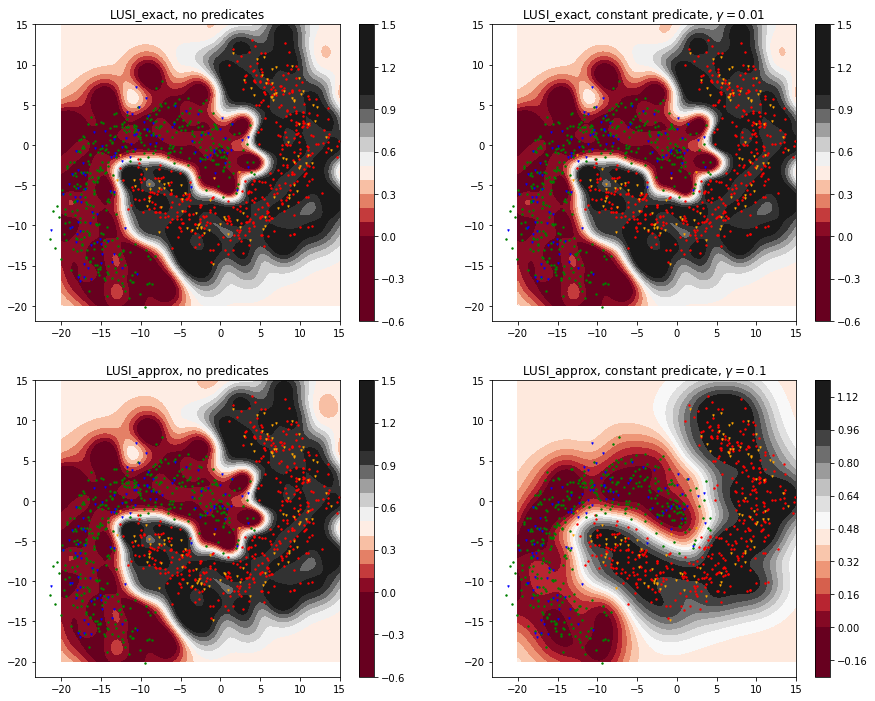

In [99]:
titles = [r"LUSI_exact, no predicates", r"LUSI_exact, constant predicate, $\gamma = 0.01$",
          r"LUSI_approx, no predicates", r"LUSI_approx, constant predicate, $\gamma = 0.1$"]
model = [model1, model2, model3, model4]
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

for i in range(2):
    for j in range(2):
        model_name = titles[i*2 + j]
        xx, yy, y_prob = predict_probability(model[i*2 + j]) 
        a = axs[i, j].contourf(xx, yy, y_prob, 20, cmap='RdGy', vmin=0, vmax=1)
        fig.colorbar(a, ax = axs[i, j])
        
        axs[i, j].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],2, label = "train: 0" , color='red')
        axs[i, j].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],2, label = "train: 1", color='green')
        axs[i, j].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1],2, marker = 'v', label = "test: 0", color='orange')
        axs[i, j].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1],2, marker = 'v', label = "test: 1", color='blue')
        axs[i, j].set_title(model_name)
        


In [100]:
fig.savefig("banana_prob.pdf", format='pdf',  pad_inches=0.0)